In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import warnings
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.metrics import make_scorer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split,  cross_validate
from sklearn.preprocessing import StandardScaler
import time
import sys, os
from sklearn.pipeline import make_pipeline


path = 'datasets/Dataset_2.xlsx'

# Read and load dataset
df= pd.read_excel(path, sheet_name="preproc")





/home/ubuntu/Desktop/Demetra/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INPUT DATA

In [2]:
X = (df.iloc[:,14:]).values
print(X.shape)
std_scaler = StandardScaler()

(2905, 530)


OUTPUT DATA

In [3]:
Y = (df.iloc[:,7]).values
print(Y.shape)

(2905,)


**NRMSEPiqr**

In [4]:


def NRMSEPiqr(observed_values, predicted_values):
    # Calculate RMSEP
    rmsep = np.sqrt(np.mean((observed_values - predicted_values) ** 2))
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(observed_values, 25)
    Q3 = np.percentile(observed_values, 75)

    # Calculate IQR
    IQR = Q3 - Q1

    return rmsep/IQR

NRMSEPiqrscorer = make_scorer(NRMSEPiqr,greater_is_better=False)


In [ ]:

mlflow.set_experiment("PLS Demetra Parameter 1")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

'''PARAM 1'''
print("Param 1")
for n_components in range(2,31):
    # number of trials
    trials = 100
    np.random.seed(42)
    seeds = np.random.randint(trials, size=trials)
    
    ripartisions = [i / 100 for i in range(5, 55, 5)]
    print(str(n_components) + " components" )
    for ripartition in ripartisions:
        
        MSE_param1 = []   
        best_MSE_1 = 100000000
        best_data_1 = {"Y_test": None, "Y_pred": None}
    
        run_name = str(n_components) + " components " + str(ripartition) + " ripartition"
        with mlflow.start_run(run_name=run_name):
            i = 0
            mlflow.log_param('ripartition', ripartition)
            mlflow.log_param('no. components', n_components)
            for i in range(trials):
                # Tell mlflow to log the following parameters for the experiments dashboard
                # Ripartition in training and test and
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:, 0], test_size=ripartition, random_state=seeds[i])
                pls_model = PLSRegression(n_components=n_components)
        
                pls_model.fit(X_train, Y_train)
        
                # Make predictions using the testing set
                Y_pred_pls = pls_model.predict(X_test)
        
                # save MSE of the first parameters
                MSE_param1.append(mean_squared_error(Y_test, Y_pred_pls))
        
                # check if this is the best model in terms of MSE
                if MSE_param1[-1] < best_MSE_1:
                    best_MSE_1 = MSE_param1[-1]
                    best_data_1["Y_test"] = Y_test
                    best_data_1["Y_pred"] = Y_pred_pls
                    
            mlflow.log_metric("Best_MSE1", best_MSE_1)
            mlflow.log_metric("Mean_MSE1", np.mean(MSE_param1))
            mlflow.log_metric("Var_MSE1", np.var(MSE_param1))


mlflow.set_experiment("PLS Demetra Parameter 2")
'''PARAM 2'''
print("Param 2")
for n_components in range(2,31):
    # number of trials
    trials = 100
    np.random.seed(42)
    seeds = np.random.randint(trials, size=trials)
    print(str(n_components) + " components" )
    ripartisions = [i / 100 for i in range(5, 55, 5)]
    
    for ripartition in ripartisions:

        MSE_param2 = []
        best_MSE_2 = 100000000
        best_data_2 = {"Y_test": None, "Y_pred": None}
        run_name = str(n_components) + " components " + str(ripartition) + " ripartition"
        with mlflow.start_run(run_name=run_name):
            i = 0
            mlflow.log_param('ripartition', ripartition)
            mlflow.log_param('no. components', n_components)
            for i in range(trials):
        
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:, 1], test_size=ripartition, random_state=seeds[i])
                pls_model = PLSRegression(n_components=n_components)
        
                pls_model.fit(X_train, Y_train)
        
                # Make predictions using the testing set
                Y_pred_pls= pls_model.predict(X_test)
        
                # save MSE of the second parameters
                MSE_param2.append(mean_squared_error(Y_test, Y_pred_pls))
        
                # check if this is the best model in terms of MSE
                if MSE_param2[-1] < best_MSE_2:
                    best_MSE_2 = MSE_param2[-1]
                    best_data_2["Y_test"] = Y_test
                    best_data_2["Y_pred"] = Y_pred_pls
        
            
            mlflow.log_metric("Best_MSE2", best_MSE_2)
            mlflow.log_metric("Mean_MSE2", np.mean(MSE_param2))
            mlflow.log_metric("Var_MSE2", np.var(MSE_param2))
            


PLS NRMSEPiqr

In [5]:

for n_components in range(2,31):
    # number of trials
    trials = 100
    np.random.seed(42)
    seeds = np.random.randint(trials, size=trials)
    
    ripartisions = [0.25, 0.50, 0.75]
    print(str(n_components) + " components" )
    for ripartition in ripartisions:
        
            NRMSEP = []
            best_value= 100000000
            best_n = 0
            best_data_1 = {"Y_test": None, "Y_pred": None}
        
            run_name = str(n_components) + " components " + str(ripartition) + " ripartition"
            for i in range(trials):

                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ripartition, random_state=seeds[i])
                X_train= std_scaler.fit_transform(X_train)
                X_test= std_scaler.transform(X_test)
                pls_model = PLSRegression(n_components=n_components)
        
                pls_model.fit(X_train, Y_train)
        
                # Make predictions using the testing set
                Y_pred_pls = pls_model.predict(X_test)
        
                # save MSE of the first parameters
                NRMSEP.append(NRMSEPiqr(Y_test, Y_pred_pls))
        
                # check if this is the best model in terms of MSE
                if NRMSEP[-1] < best_NRMSEP:
                    best_NRMSEP = NRMSEP[-1]
                    best_data_1["Y_test"] = Y_test
                    best_data_1["Y_pred"] = Y_pred_pls
                    best_data_1["seed"] = seeds[i]
                    best_data_1["model"] = pls_model




2 components


2024/09/30 09:25:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run 2 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/3f41c0e0c7b548569846e936c9f7ebf0.
2024/09/30 09:25:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:25:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run 2 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/aaf4ce342ab046e7bba8e2756ebb92af.
2024/09/30 09:25:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:26:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run 2 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/64ac370cdd524e4fb64cc1a68b7468cb.
2024/09/30 09:26:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

3 components


2024/09/30 09:26:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run 3 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/c51ed57351c04268b8efd1adc53e08e9.
2024/09/30 09:26:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:26:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run 3 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/4aa75ce08cf04bf697aaae7b1da9b47b.
2024/09/30 09:26:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:26:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run 3 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/d35931b37bb64d1fb87b9b2ee99216c2.
2024/09/30 09:26:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

4 components


2024/09/30 09:27:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run 4 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a978e2c422ab4b0182c921c78e54a7d6.
2024/09/30 09:27:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:27:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run 4 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/9477c1c86fe74e9f9b3b314787f33f67.
2024/09/30 09:27:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:28:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run 4 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/d91e5a71055e45058119abd59ac8c7a9.
2024/09/30 09:28:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

5 components


2024/09/30 09:28:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run 5 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/81e340f1b52749ee8a505330b0243eb8.
2024/09/30 09:28:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:28:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run 5 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a355dca046da4d49811de8cd5376bdfd.
2024/09/30 09:28:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:29:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run 5 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/8e19bdb88dd243c7b890a4703ea9022e.
2024/09/30 09:29:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

6 components


2024/09/30 09:29:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run 6 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/b597fd38d2fe4ebd844f61d434d8c6c9.
2024/09/30 09:29:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:30:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run 6 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/c5a575a52e4443288d2cb1d81979a60b.
2024/09/30 09:30:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:30:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run 6 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/8813b65181494de89ef87814256bef75.
2024/09/30 09:30:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

7 components


2024/09/30 09:30:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run 7 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/ee0963bd8afd4a8c9e9ed17ca7303141.
2024/09/30 09:30:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:31:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run 7 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/c05ed05744d14e5bb8566279c4f94586.
2024/09/30 09:31:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:31:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run 7 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/b17e0e2c8ec343d9a7bacc4231c04772.
2024/09/30 09:31:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

8 components


2024/09/30 09:32:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run 8 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/df1fb39d55384664a81c13f078f99ceb.
2024/09/30 09:32:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:32:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run 8 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/f02680911e074b9bbf04068324239886.
2024/09/30 09:32:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:33:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run 8 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/60b7691ec70c40ee93fc215ac9681089.
2024/09/30 09:33:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

9 components


2024/09/30 09:33:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run 9 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/597d217073e24999bc53fb887b26784a.
2024/09/30 09:33:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:34:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run 9 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/dac51cfda9494ee98cf154c2101415ca.
2024/09/30 09:34:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:34:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run 9 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/e83614e981484642ac660b0424485f68.
2024/09/30 09:34:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http

10 components


2024/09/30 09:35:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run 10 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/ffa0bb21017f4250a868c73a9d25b008.
2024/09/30 09:35:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:35:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run 10 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/c2252174578d47159c2b5cc4cdbb61f1.
2024/09/30 09:35:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:35:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run 10 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/51d7b2dbf29b41cf8f17de0d5ba97d3c.
2024/09/30 09:35:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

11 components


2024/09/30 09:36:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run 11 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/89e03a2b186b43fb8a10115018c34e60.
2024/09/30 09:36:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:37:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run 11 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/05b22da853a74585ac0a2f8e2e6b316b.
2024/09/30 09:37:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:37:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run 11 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/02198ed12fbf467ab8af2d32c0f6e9ae.
2024/09/30 09:37:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

12 components


2024/09/30 09:38:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run 12 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/dddc3c414deb49d9bf4913b7e42165c6.
2024/09/30 09:38:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:38:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run 12 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/d7d04597ceba45b685e0fd900b43ce65.
2024/09/30 09:38:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:39:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run 12 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/aa88d2d8dc76417dbe0941398122671f.
2024/09/30 09:39:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

13 components


2024/09/30 09:40:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run 13 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/5bda6556bacb42fe95d3d7d432e043e7.
2024/09/30 09:40:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:40:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run 13 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/8d07e542372b44a9845f81d25458674e.
2024/09/30 09:40:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:41:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run 13 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/37182ae6a3c447f193c5cf408e39c73f.
2024/09/30 09:41:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

14 components


2024/09/30 09:42:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run 14 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/730a2c7792de452396d0f4902d9756be.
2024/09/30 09:42:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:42:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run 14 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/0bca92a670a64b4e97c126a0407fe453.
2024/09/30 09:42:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:43:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run 14 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/b5ba320d4f784983a6cc6ecf8c462fff.
2024/09/30 09:43:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

15 components


2024/09/30 09:44:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run 15 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/f2cf5e4c7bb24b76be05a350e5ee1aaa.
2024/09/30 09:44:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:44:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run 15 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/971001326fb24b5482f83138d70c0e59.
2024/09/30 09:44:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:45:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run 15 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/d3f3e479e18f4729b1ee78c26e9ebd10.
2024/09/30 09:45:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

16 components


2024/09/30 09:46:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run 16 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/34081ff63d04465ca8c3c5c50cdc09a4.
2024/09/30 09:46:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:46:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run 16 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/57cd1015d7584921aaba618f58c40429.
2024/09/30 09:46:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:47:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run 16 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/5f16fefbe8eb4859806b838022a57c1f.
2024/09/30 09:47:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

17 components


2024/09/30 09:48:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run 17 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/27118659285a4389a88f195d82b7364d.
2024/09/30 09:48:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:48:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run 17 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a55f1b9191d34c1490e6c693bf07810a.
2024/09/30 09:48:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:49:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run 17 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/0c721f74fbef4442b60b192175a24c64.
2024/09/30 09:49:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

18 components


2024/09/30 09:50:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run 18 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/faf17b9ee5a7460bbd282d95b25f8af7.
2024/09/30 09:50:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:50:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run 18 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/80ede1769d5449a288334dc6625aaac5.
2024/09/30 09:50:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:51:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run 18 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a25dd86f3ffb439ba81ee15348d8bc1b.
2024/09/30 09:51:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

19 components


2024/09/30 09:52:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run 19 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/1f94dbea3ca34063ae46d43fe038f855.
2024/09/30 09:52:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:53:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run 19 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/7c657ada670343cfb35da38decc16eb9.
2024/09/30 09:53:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:53:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run 19 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a0661b84b2eb4f688fb9b3395f9a74f2.
2024/09/30 09:53:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

20 components


2024/09/30 09:54:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run 20 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/bb5e6b08d7ab46a2a7fd2beebcb68611.
2024/09/30 09:54:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:55:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run 20 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/7fa7af5bafb74ea5a192096a4606b8d4.
2024/09/30 09:55:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:55:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run 20 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/d3742b2569294fdfa9ae8b867c2762e8.
2024/09/30 09:55:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

21 components


2024/09/30 09:56:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run 21 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/52a337157e2647258844be117e7eee68.
2024/09/30 09:56:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:57:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run 21 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/521215fe00344de9afb4fb96ca9599ad.
2024/09/30 09:57:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 09:57:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run 21 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/4d307bad78a24d7ba7834c6d996d6c36.
2024/09/30 09:57:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

22 components


2024/09/30 09:59:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run 22 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/2ba65655fa9c48fe807125d8e0503aa4.
2024/09/30 09:59:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:00:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run 22 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/317223ab381d4adbb06fb303aa32ac4d.
2024/09/30 10:00:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:00:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run 22 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/980c8cc6e5b14ff48436fcb8bd069fa0.
2024/09/30 10:00:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

23 components


2024/09/30 10:02:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run 23 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/809ea6e58b3648788ddd2f05921d04f2.
2024/09/30 10:02:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:03:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run 23 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/29df600f611e4da494e6616e35111bc0.
2024/09/30 10:03:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:03:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run 23 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/63b60e6604ee4eae8405ff693f76197e.
2024/09/30 10:03:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

24 components


2024/09/30 10:05:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run 24 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/58742a64136e4deabb11f016f937ce9c.
2024/09/30 10:05:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:06:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run 24 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/7c316ba172db48f09eade8ff3c35e672.
2024/09/30 10:06:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:06:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run 24 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/428081beae804030a2215c927fbc510d.
2024/09/30 10:06:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

25 components


2024/09/30 10:08:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run 25 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/8bb2be7984654ae9aa36f34d923ef9fa.
2024/09/30 10:08:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:09:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run 25 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/2981cc13c6494ff5ba255f32ca190759.
2024/09/30 10:09:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:09:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run 25 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/76a99a8cf63d4887a2e60d67856e8423.
2024/09/30 10:09:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

26 components


2024/09/30 10:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run 26 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/e1ca3dfd908f4e3caee6dcb9c3f22151.
2024/09/30 10:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:12:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run 26 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/f7bb6f14a94c435bab930927b8f68dc4.
2024/09/30 10:12:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:13:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run 26 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/118ab871b40f435f9470fd3f70fced0f.
2024/09/30 10:13:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

27 components


2024/09/30 10:14:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run 27 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/69b1c37a884946cf886b93e2d9383935.
2024/09/30 10:14:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:15:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run 27 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a182ae1c93bd465b99651772775fe301.
2024/09/30 10:15:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:16:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run 27 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/a9da109c9e77435692d9afc48c7c490a.
2024/09/30 10:16:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

28 components


2024/09/30 10:18:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run 28 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/3a8a83b3932d40c4a279c74fdee41c94.
2024/09/30 10:18:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:19:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run 28 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/9ad664b7ffe4416b83a59ec7f8293fd6.
2024/09/30 10:19:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:20:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run 28 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/7a7957ed025845a5a64bc01bbff61cae.
2024/09/30 10:20:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

29 components


2024/09/30 10:22:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run 29 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/4aef55dd1e0d48919b22266cdaf4e429.
2024/09/30 10:22:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:23:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run 29 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/061605a0c6304fadb3ddaa2bd204212e.
2024/09/30 10:23:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:23:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run 29 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/6bece1963a0e4b80bfb7ef640252f831.
2024/09/30 10:23:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

30 components


2024/09/30 10:25:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run 30 components 0.25 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/9c8e18ef98d44e9682b04fbbd2114f68.
2024/09/30 10:25:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:26:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run 30 components 0.5 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/0393dfd742dc43859ed225aac9437d8a.
2024/09/30 10:26:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/368839824312229495.
2024/09/30 10:27:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run 30 components 0.75 ripartition at: http://127.0.0.1:5000/#/experiments/368839824312229495/runs/9e9f56de8244407a9ced75f44f7029d1.
2024/09/30 10:27:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: h

PLS NRMSEPiqr 2 components

2 components
2 components 0.25 ripartition
2 components 0.5 ripartition
2 components 0.75 ripartition
╔════════════════╦═══════════════════╦═══════════════════╦══════════════════╦════════╦═════════════╗
║   Test size(%) ║   Best(NRMSEPiqr) ║   Mean(NRMSEPiqr) ║   Var(NRMSEPiqr) ║   Seed ║   Time(sec) ║
╠════════════════╬═══════════════════╬═══════════════════╬══════════════════╬════════╬═════════════╣
║             25 ║          0.603656 ║          0.72413  ║      0.00214852  ║     20 ║  0.0178249  ║
║             50 ║          0.655271 ║          0.729639 ║      0.000674775 ║     60 ║  0.0126042  ║
║             75 ║          0.712713 ║          0.74048  ║      0.000342648 ║     87 ║  0.00323033 ║
╚════════════════╩═══════════════════╩═══════════════════╩══════════════════╩════════╩═════════════╝


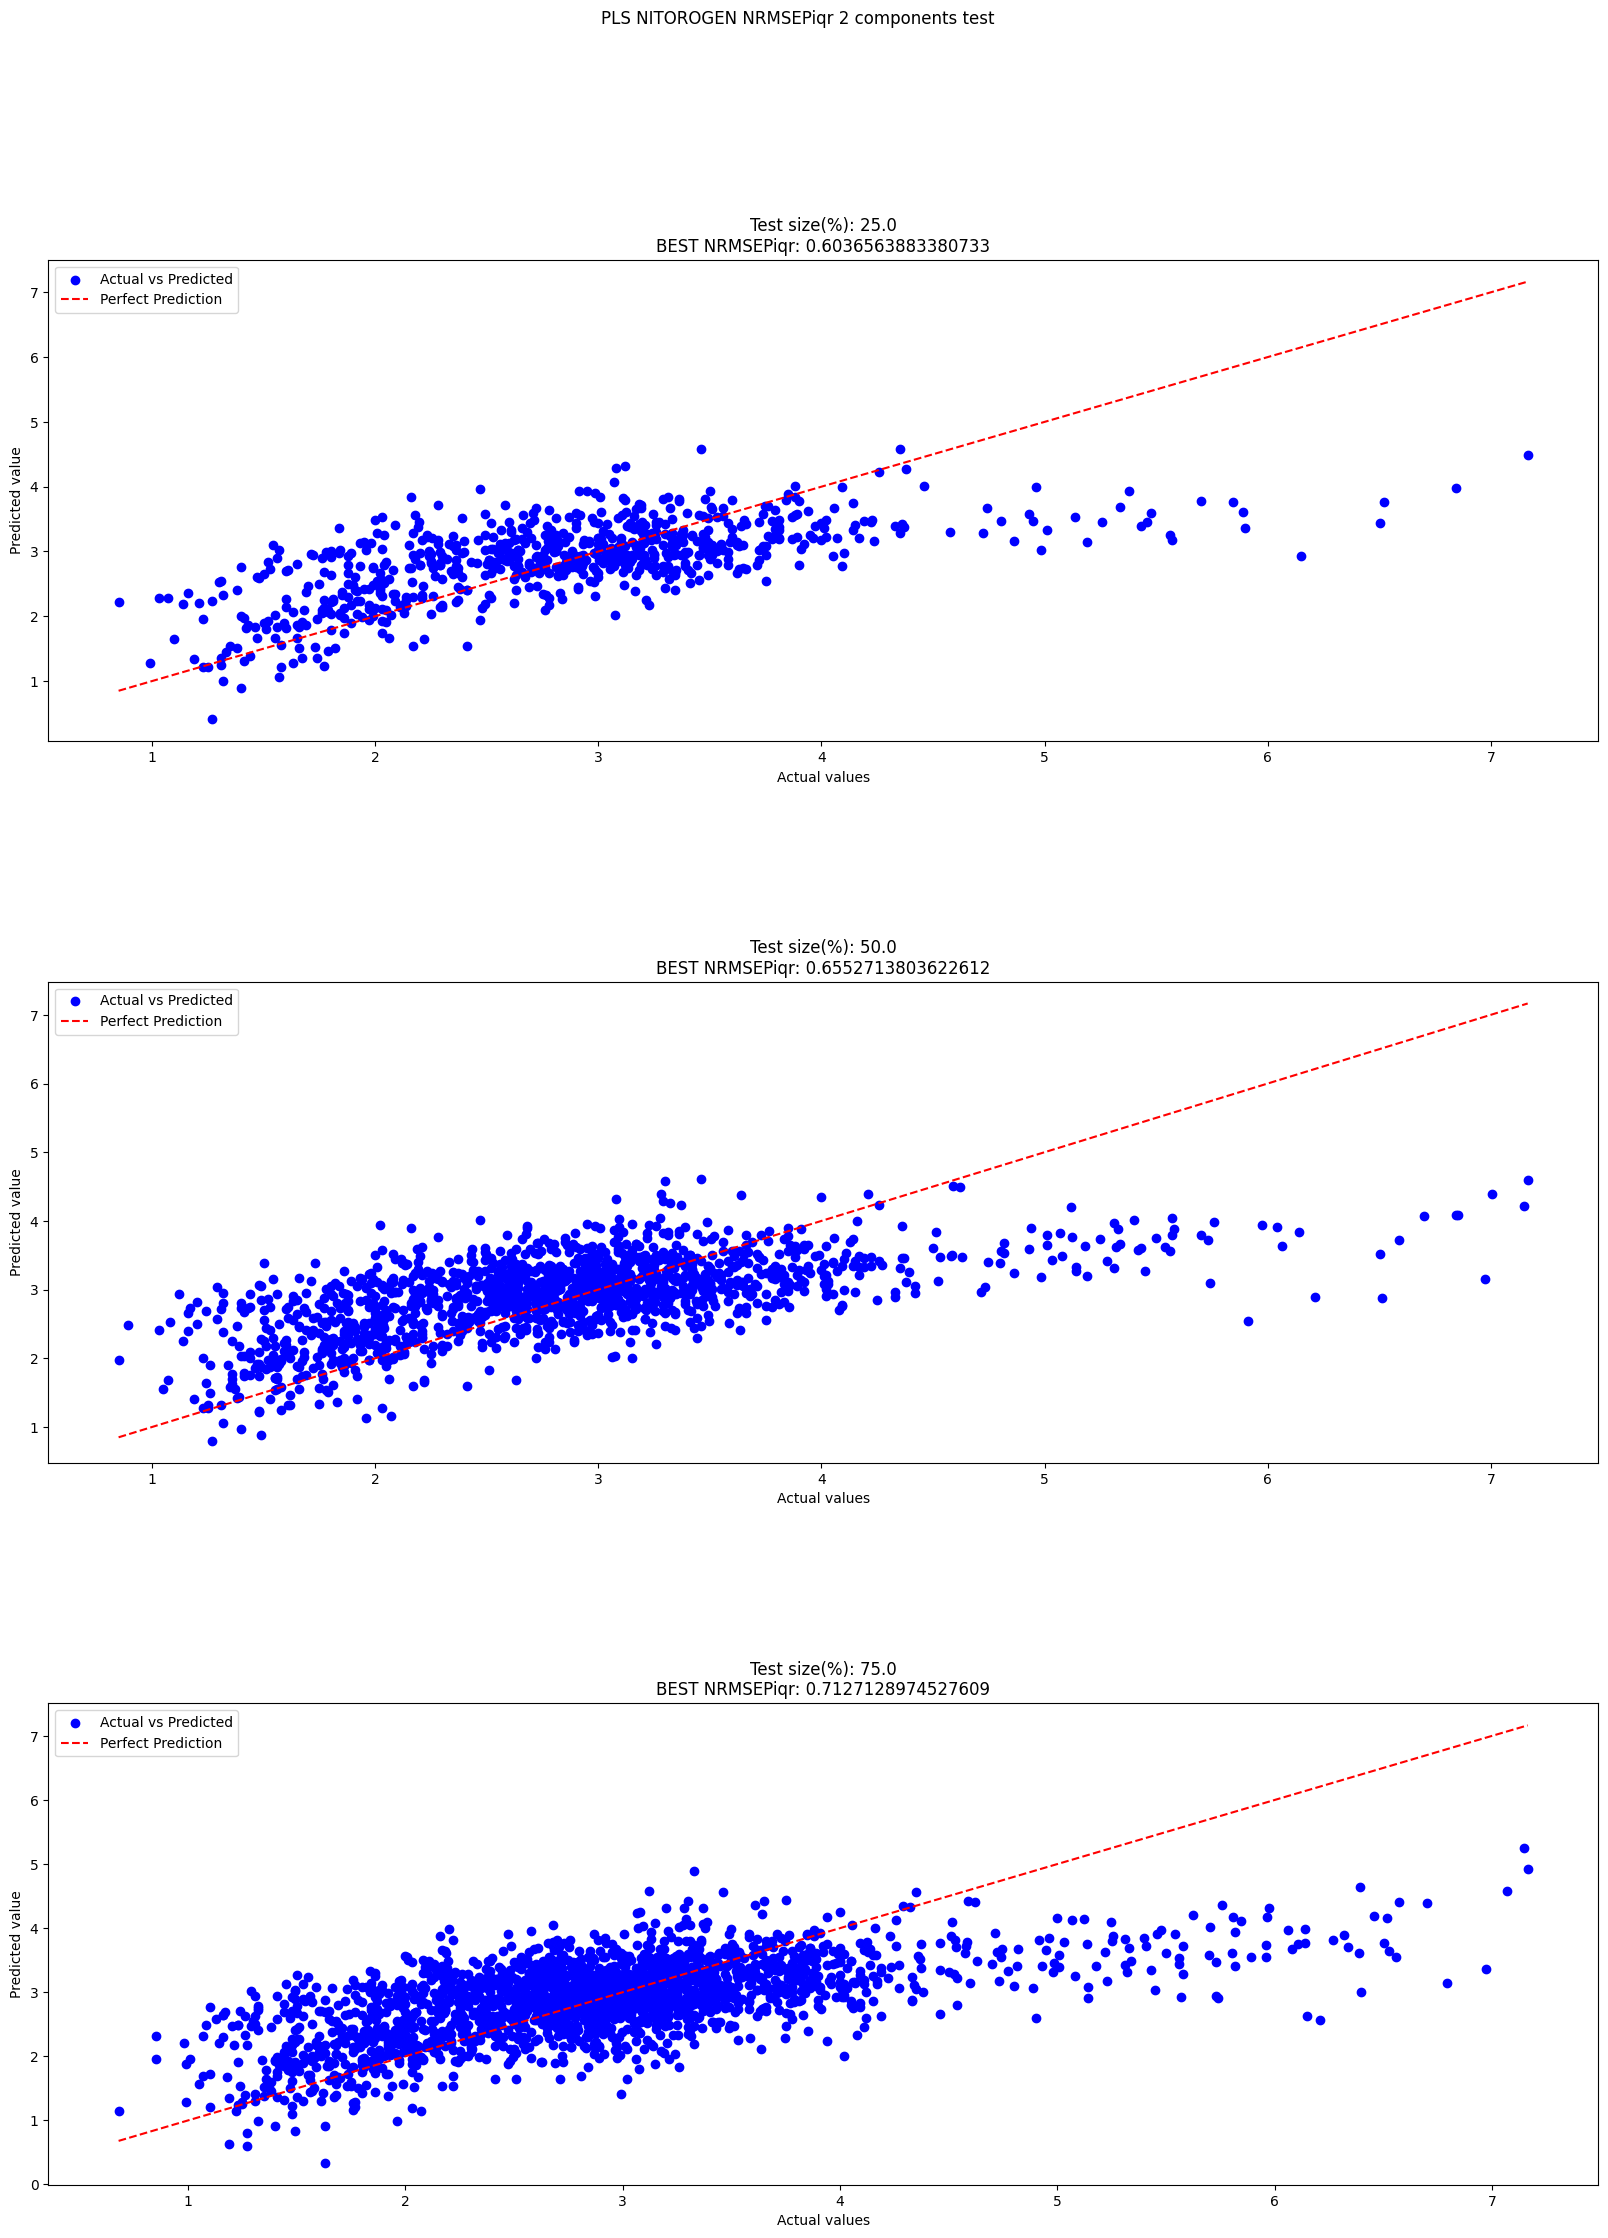

In [5]:

n_components = 2


results = []  

# create 3x1 subfigs
fig, axs = plt.subplots(3, 1,figsize=(20, 25),gridspec_kw={'hspace': 0.5})
fig.suptitle('PLS NITOROGEN NRMSEPiqr 2 components test' + "\n")
axs = axs.flatten()
k = 0

# number of trials
trials = 100
np.random.seed(42)
seeds = np.random.randint(trials, size=trials)
    
ripartisions = [0.25, 0.50, 0.75]
print(str(n_components) + " components" )
for ripartition in ripartisions:
        
            NRMSEP = []
            best_NRMSEP = 100000000
            best_data_1 = {"Y_test": None, "Y_pred": None}
        
            run_name = str(n_components) + " components " + str(ripartition) + " ripartition"
        
            print(run_name)            
            i = 0
            for i in range(trials):
                print("Trial:",i+1)
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ripartition, random_state=seeds[i])
                X_train= std_scaler.fit_transform(X_train)
                X_test= std_scaler.transform(X_test)
                pls_model = PLSRegression(n_components=n_components)
        
                start_time = time.time()
                pls_model.fit(X_train, Y_train)
                elapsed_time = (time.time() -start_time) #elapsed time in seconds
        
                # Make predictions using the testing set
                Y_pred_pls = pls_model.predict(X_test)
        
                # save MSE of the first parameters
                NRMSEP.append(NRMSEPiqr(Y_test, Y_pred_pls))
        
                # check if this is the best model in terms of MSE
                if NRMSEP[-1] < best_NRMSEP:
                    best_NRMSEP = NRMSEP[-1]
                    best_data_1["Y_test"] = Y_test
                    best_data_1["Y_pred"] = Y_pred_pls
                    best_data_1["seed"] = seeds[i]
                    best_data_1["model"] = pls_model
                    best_data_1["time"] = elapsed_time


      
            results.append([str(ripartition *100 ), str(best_NRMSEP),
                            (np.mean(NRMSEP)), str(np.var(NRMSEP)),
                        str(best_data_1["seed"]),best_data_1["time"]])

            '''PLOT THE BEST MODELS'''
            axs[k].scatter(best_data_1["Y_test"], best_data_1["Y_pred"], c='blue', label='Actual vs Predicted')
            axs[k].plot([min(best_data_1["Y_test"]), max(best_data_1["Y_test"])],
                        [min(best_data_1["Y_test"]), max(best_data_1["Y_test"])], '--', c='red', label='Perfect Prediction')
            axs[k].legend()
            axs[k].set_xlabel("Actual values")
            axs[k].set_ylabel("Predicted value")
            axs[k].set_title( f"Test size(%): {ripartition * 100}" "\n" + "BEST NRMSEPiqr: " + results[k][1] )
            k += 1


'''SHOW RESULTS'''

headers = ["Test size(%)", "Best(NRMSEPiqr)", "Mean(NRMSEPiqr)", "Var(NRMSEPiqr)","Seed","Time(sec)"]
print(tabulate(results, headers,  tablefmt="double_outline"))
